<a href="https://colab.research.google.com/github/jruiza74/DATASCIENCE-2023-2024/blob/main/EV_HypothesisTesting_JuanRuiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! pip install pingouin
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=703936c8fb8c224f6ec725c1a8fdddcd789d333345784270632741393bfbfe62
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils
Mounted at /content/drive


## **Los datos hacen referencia a las emisiones de CO2 por paises y años desde 1750 hasta 2022.**

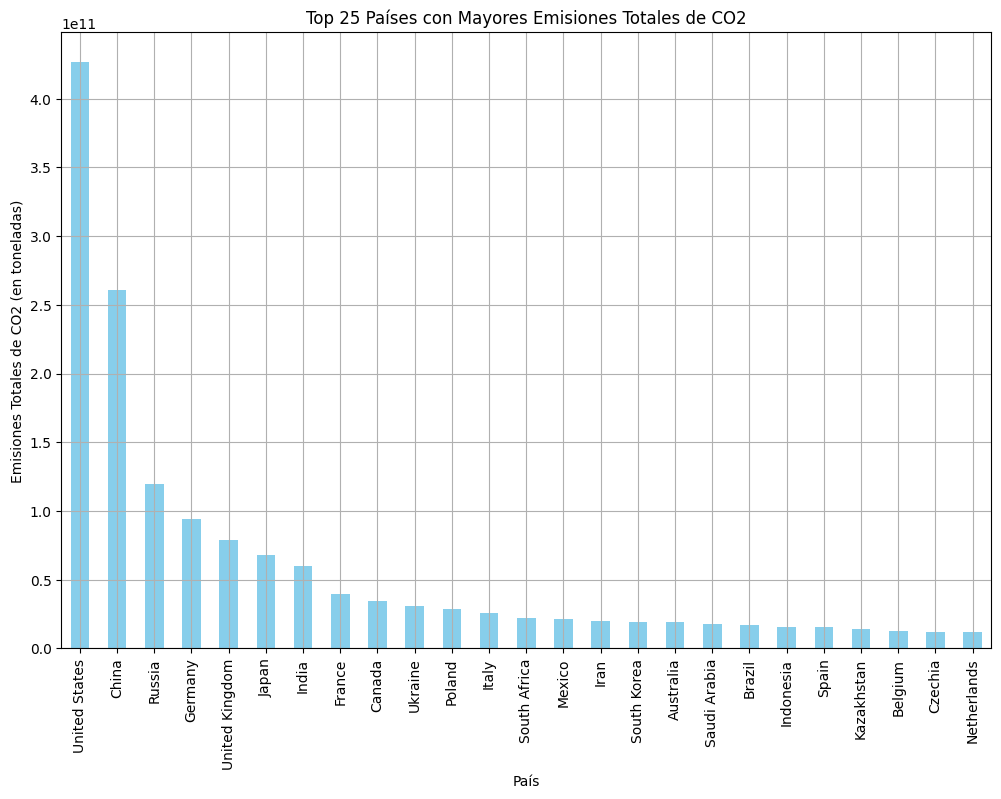

In [6]:
df_co2emisions = pd.read_csv(r"/content/drive/Othercomputers/Mi portátil/Desktop/M02 - RUBEN/PROYECTO/annual-co2-emissions-per-country.csv")
continentes = ["Africa", "Europe", "Asia", "North America", "South America", "Oceania", "Antarctica"]

paises = df_co2emisions[df_co2emisions['Code'].notna() & (df_co2emisions['Entity'] != 'World')]
df_continentes = df_co2emisions[df_co2emisions['Entity'].isin(continentes)]

media_mundial = df_co2emisions[df_co2emisions['Entity'] == 'World']['Annual CO₂ emissions'].mean()

emisiones_totales_paises = paises.groupby('Entity')['Annual CO₂ emissions'].sum().sort_values(ascending=False)
emisiones_totales_continentes=df_continentes.groupby('Entity')['Annual CO₂ emissions'].sum().sort_values(ascending=False)
top_25_paises = emisiones_totales_paises.head(25)

plt.figure(figsize=(12, 8))
top_25_paises.plot(kind='bar', color='skyblue')
plt.title('Top 25 Países con Mayores Emisiones Totales de CO2')
plt.xlabel('País')
plt.ylabel('Emisiones Totales de CO2 (en toneladas)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

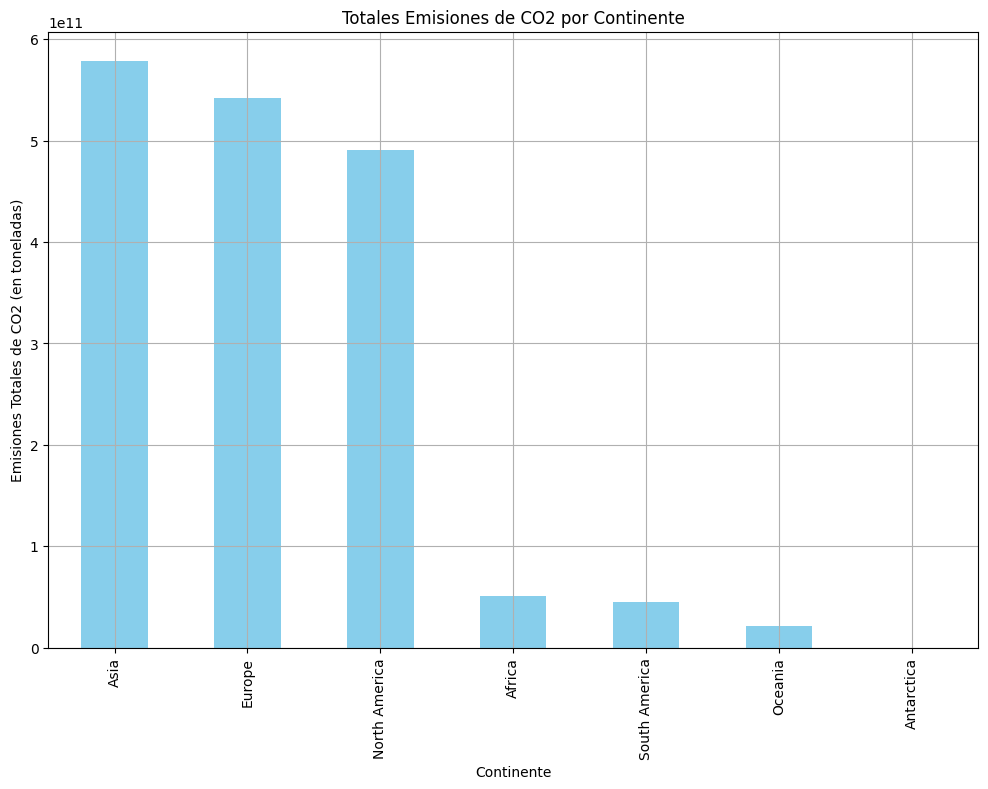

In [7]:
plt.figure(figsize=(12, 8))
emisiones_totales_continentes.plot(kind='bar', color='skyblue')
plt.title('Totales Emisiones de CO2 por Continente')
plt.xlabel('Continente')
plt.ylabel('Emisiones Totales de CO2 (en toneladas)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()



## El protocolo de Kioto estable que el periodo comprendido entre el año 2008 y el 2012 España debía limitar el incremento de sus emisiones de gases de efecto invernadero de manera que la media de emisiones netas no superase el 15% del nivel de emisiones del año base (1990/1995).Las emisiones de España en 1990/1995 fueron 246.290.623. por lo que en 2008/2012 no se deberían superar los 283.234.216 **texto en negrita**


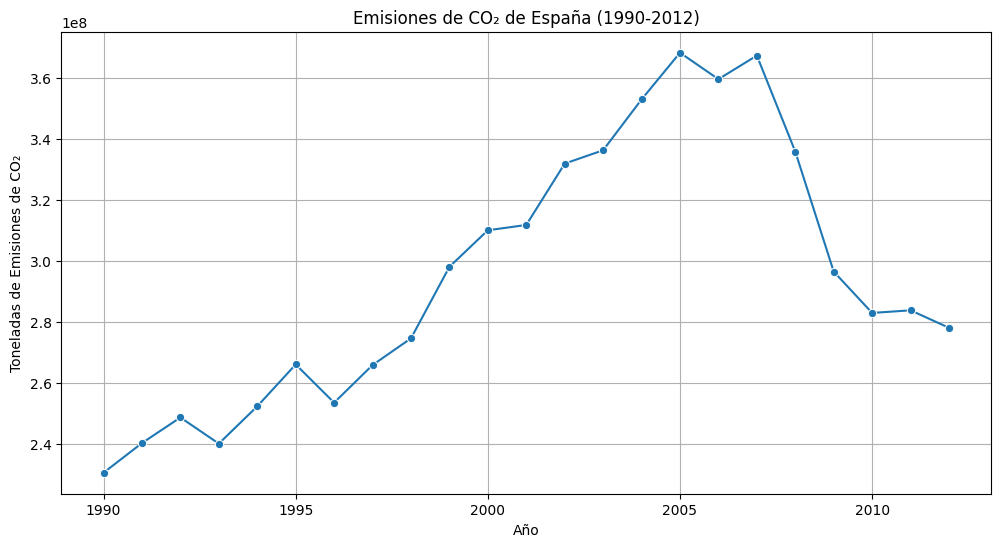

In [8]:
import seaborn as sns

emisiones_spain = df_co2emisions[(df_co2emisions['Entity'] == 'Spain') &
                                   (df_co2emisions['Year'] >= 1990) &
                                   (df_co2emisions['Year'] <= 2012)]



plt.figure(figsize=(12, 6))
sns.lineplot(data=emisiones_spain, x='Year', y='Annual CO₂ emissions', marker='o')
plt.title('Emisiones de CO₂ de España (1990-2012)')
plt.xlabel('Año')
plt.ylabel('Toneladas de Emisiones de CO₂')
plt.grid(True)
plt.show()


A priori según el gráfico parece que las emisiones emitidas 2008-2012 entre los años ha superado el 15% de las emisiones en el año 1990-1995. No obstante vamos a verificarlo mediente el calculo estadístico.

In [9]:
#Emisiones de españa en el periodo 1990-1990
emisiones_spain_1990_1995 = paises[(paises['Entity'] == 'Spain') & (paises['Year'] >= 1990) & (paises['Year'] <= 1995)]
#Calculamos la media de emisones en el periodo y lo incrementamos un 15%
mean_emisiones_spain_1990_1995 = emisiones_spain_1990_1995['Annual CO₂ emissions'].mean()
prevision_spain_2008_2012 = mean_emisiones_spain_1990_1995 * 1.15
print(mean_emisiones_spain_1990_1995)
print(prevision_spain_2008_2012)

246290623.33333334
283234216.8333333


In [10]:
emisiones_spain_1990_1995 = paises[(paises['Entity'] == 'Spain') & (paises['Year'] >= 1990) & (paises['Year'] <= 1995)]
mean_emisiones_spain_1990_1995 = emisiones_spain_1990_1995['Annual CO₂ emissions'].mean()
prevision_spain_2008_2012 = mean_emisiones_spain_1990_1995 * 1.15
emisiones_spain_2008_2012 = paises[(paises['Entity'] == 'Spain') & (paises['Year'] >= 2008) & (paises['Year'] <= 2012)]
mean_emisiones_spain_2008_2012 = emisiones_spain_2008_2012['Annual CO₂ emissions'].mean()

In [11]:
# Realizamos un test de hipotesis
# Ho: media emisiones 2008-2012 > media emisiones 1990-1995 + 15%
# H1: media emisiones 2008-2012 < media emisiones 1990-1995 + 15%

test_result = pg.ttest(emisiones_spain_2008_2012['Annual CO₂ emissions'], prevision_spain_2008_2012, alternative='greater')


print(test_result)

               T  dof alternative     p-val               CI95%   cohen-d  \
T-test  1.155371    4     greater  0.156128  [272920986.7, inf]  0.516698   

         BF10     power  
T-test  1.282  0.248654  


No podemos rechazar la hipótesis nula. No hay suficiente evidencia estadística para afirmar que la media de las emisiones anuales de CO₂ de España en 2008-2012 es al menos un 15% superior a la media del período 1990-1995 ya que el valor de p-val no es inferior a 0.05


## El presidente de los Estados Unidos Barack Obema gobernó entre 2009 y 2017 impulsado politicas para el cambio climático.  Sin embargo Donald Trumpo es un negacionista del cambio climático revirtiendo muchas políticas medioambiantes. Hipotesis:La media de emisiones durante el mandato de Barck Obama es inferior al mandato de Donald Trump. Para se justos aplicaremos el mimo rango de años.

In [12]:
Emisiones_Usa = df_co2emisions[df_co2emisions['Entity'] == 'United States']
datos_trump = Emisiones_Usa[(Emisiones_Usa['Year'] >= 2017) & (Emisiones_Usa['Year'] <= 2022)]['Annual CO₂ emissions']
datos_obama = Emisiones_Usa[(Emisiones_Usa['Year'] >= 2011) & (Emisiones_Usa['Year'] <= 2016)]['Annual CO₂ emissions']
print(datos_trump.mean())
print(datos_obama.mean())

5109374766.666667
5421407450.0


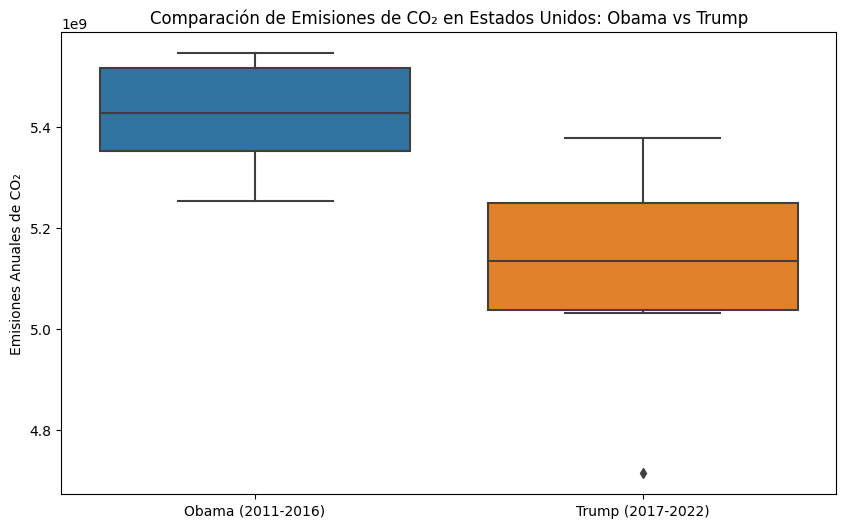

In [13]:
plt.figure(figsize=(10, 6))

datos_obama = datos_obama.rename('Obama (2011-2016)')
datos_trump = datos_trump.rename('Trump (2017-2022)')
datos_presidencias = pd.concat([datos_obama, datos_trump], axis=1)
sns.boxplot(data=datos_presidencias)
plt.title('Comparación de Emisiones de CO₂ en Estados Unidos: Obama vs Trump')
plt.ylabel('Emisiones Anuales de CO₂')
plt.show()

Los datos de grafico muestra que durante el mandato de Obama se emitieron más Toneladas que durante el mandato de Obama pero quizá no sea el gráfico más adecuado.

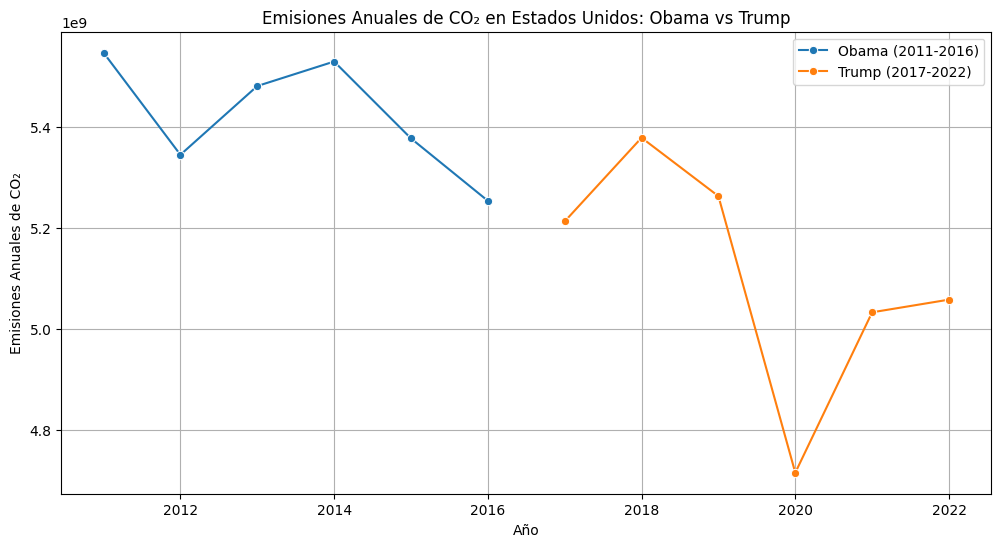

In [14]:
# Preparando los datos para el gráfico de líneas
emisiones_obama = Emisiones_Usa[(Emisiones_Usa['Year'] >= 2011) & (Emisiones_Usa['Year'] <= 2016)]
emisiones_trump = Emisiones_Usa[(Emisiones_Usa['Year'] >= 2017) & (Emisiones_Usa['Year'] <= 2022)]

# Creando el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=emisiones_obama, x='Year', y='Annual CO₂ emissions', label='Obama (2011-2016)', marker='o')
sns.lineplot(data=emisiones_trump, x='Year', y='Annual CO₂ emissions', label='Trump (2017-2022)', marker='o')

plt.title('Emisiones Anuales de CO₂ en Estados Unidos: Obama vs Trump')
plt.xlabel('Año')
plt.ylabel('Emisiones Anuales de CO₂')
plt.legend()
plt.grid(True)
plt.show()

Vemos que hay un denceso importante en el año 2020 por la pandemia.

In [15]:
#Relizamos Hipotesis
#H1: Trump_emisiones_media > Obama_emisiones_media
#H0: Trump_emisiones_media < Obama_emisiones_media
test_result = pg.ttest(datos_trump, datos_obama, alternative='greater')
print(test_result)

               T  dof alternative    p-val                 CI95%   cohen-d  \
T-test -2.942579   10     greater  0.99264  [-504227018.34, inf]  1.698899   

         BF10     power  
T-test  0.125  0.000005  


Dado que el valor de p-val es muy alto (>0.005) indica que no hay evidencias suficientes para rechazar la hipotesis nula, no se puede afirmar que las emisiones durante el mandato de Trump fueron mayores, pero según estos datos no podemos confirmar lo contrario. Los gráficos obtenidos si que lo demuestra pero no con este test.

# El pais que más contamina es Estados Unidos, pero estamos viendo datos históricos. Teniendo en cuenta que la revolución Industrial el China no se dío hasta la década de los 70 y sin embargo en Estados Unidos comenzó a principios del siglo XIX. ¿Se puede concluir que Estados Unidos emite de media más emisiones que China?

In [16]:
#Hipotesis
#H0: media_emisiones_USA < media_emisiones_China
#H1: media_emisiones_USA > media_emisiones_China
emisiones_usa = df_co2emisions[df_co2emisions['Entity'] == 'United States']['Annual CO₂ emissions']
emisiones_china = df_co2emisions[df_co2emisions['Entity'] == 'China']['Annual CO₂ emissions']
test_result = pg.ttest(emisiones_usa, emisiones_china, alternative='greater')
print(test_result)

               T         dof alternative     p-val                 CI95%  \
T-test -0.983547  164.052524     greater  0.836607  [-891191018.92, inf]   

         cohen-d BF10   power  
T-test  0.129105  0.4  0.0028  


Dado que el valor de p_val es >0.05 no podemos rechazar la hipótesis nula. No hay suficiente evidencia estadística para afirmar que las emisiones anuales de CO₂ de Estados Unidos son mayores que las de China

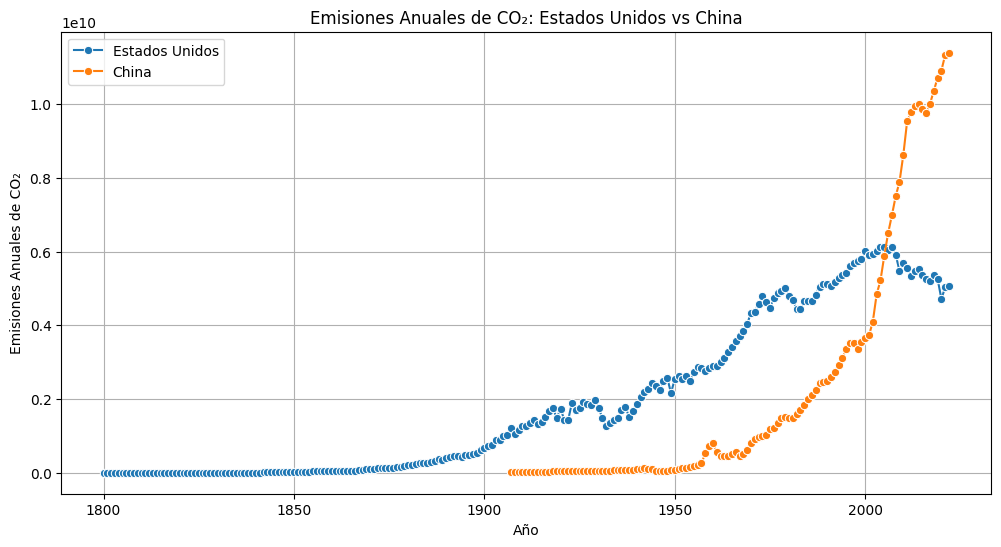

In [17]:
emisiones_usa = df_co2emisions[df_co2emisions['Entity'] == 'United States']
emisiones_china = df_co2emisions[df_co2emisions['Entity'] == 'China']
plt.figure(figsize=(12, 6))
sns.lineplot(data=emisiones_usa, x='Year', y='Annual CO₂ emissions', label='Estados Unidos', marker='o')
sns.lineplot(data=emisiones_china, x='Year', y='Annual CO₂ emissions', label='China', marker='o')
plt.title('Emisiones Anuales de CO₂: Estados Unidos vs China')
plt.xlabel('Año')
plt.ylabel('Emisiones Anuales de CO₂')
plt.legend()
plt.grid(True)
plt.show()

Como se observa en el gráfico las Emisiones de Estados Unidos son claramente superiores a las de China hasta 2002 aproximadamente.A partir de 2002 el incremento de las emisones de China son casi exponenciales con lo que justifica el dato obtenido en el T-test.

Text(0.5, 0, 'País')

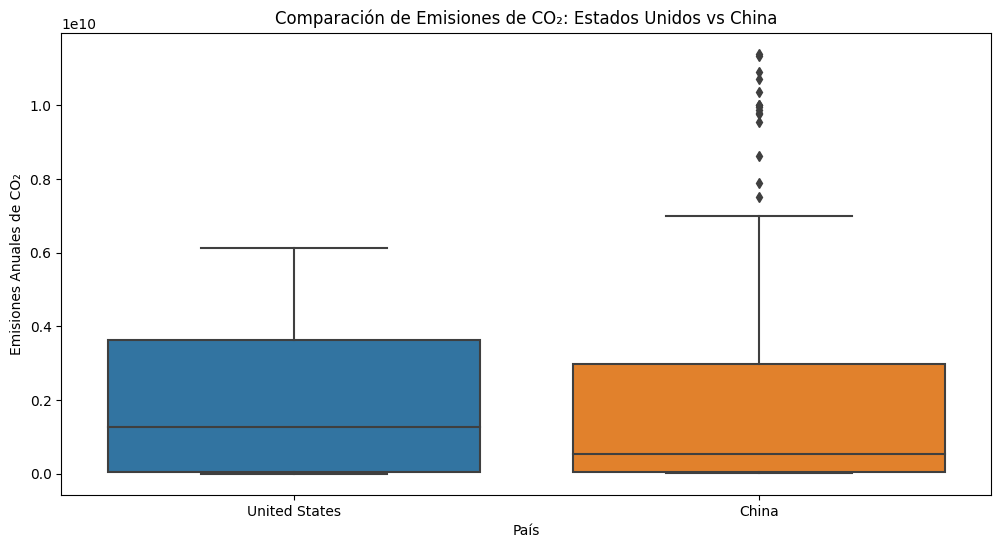

In [20]:
emisiones_usa = df_co2emisions[df_co2emisions['Entity'] == 'United States'][['Year', 'Annual CO₂ emissions']]
emisiones_china = df_co2emisions[df_co2emisions['Entity'] == 'China'][['Year', 'Annual CO₂ emissions']]
emisiones_usa['Country'] = 'United States'
emisiones_china['Country'] = 'China'
emisiones_combinadas = pd.concat([emisiones_usa, emisiones_china])
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Annual CO₂ emissions', data=emisiones_combinadas)
plt.title('Comparación de Emisiones de CO₂: Estados Unidos vs China')
plt.ylabel('Emisiones Anuales de CO₂')
plt.xlabel('País')

Cuando se comparan los dos países, parece que Estados Unidos tiene tiene una mediana más alta y un rango más amplio de emisiones de CO₂. Sin embargo los bigotes más largos y los puntos que aparecen por encima de los bigotes en el gráfico de China indican la presencia de valores atípicos, es decir, años en los que las emisiones fueron considerablemente más altas que lo común para ese país.

In [18]:
#Analisis de población por edad
#df_poblacion = pd.read_csv(r"/content/drive/Othercomputers/Mi portátil/Desktop/M02 - RUBEN/PROYECTO/population-and-demography.csv")